http://lib.stat.cmu.edu/datasets/Plasma_Retinol

Determinants of Plasma Retinol and Beta-Carotene Levels

Summary:
Observational studies have suggested that low dietary intake or low plasma concentrations of retinol, beta-carotene, or other carotenoids might be associated with increased risk of developing certain types of cancer.  However, relatively few studies have investigated the determinants of plasma concentrations of these micronutrients. We designed a cross-sectional study to investigate the relationship between personal characteristics and dietary factors, and plasma concentrations of retinol, beta-carotene and other carotenoids. Study subjects (N = 315) were patients who had an elective surgical procedure during a three-year period to biopsy or remove a lesion of the lung, colon, breast, skin, ovary or uterus that was found to be non-cancerous. We display the data for only two of the analytes.
	Plasma concentrations of the micronutrients varied widely from subject to subject.  While plasma retinol levels varied by age and sex, the only dietary predictor was alcohol consumption (R^2 = .38). Plasma beta-carotene levels were log-transformed prior to the analyses due to severe asymmetry of the residuals on the original scale. For log beta-carotene, dietary intake, regular use of vitamins, and intake of fiber were associated with higher plasma concentrations, while Quetelet Index (defined as weight/height^2 in the units kg/m^2) and cholesterol intake were associated with lower plasma levels, adjusting for the other factors (R^2 = .50). There was one extremely high leverage point in alcohol consumption that was deleted prior to the analyses. Plasma concentrations of retinol and beta-carotene were not correlated.
	We conclude that there is wide variability in plasma concentrations of these micronutrients in humans, and that much of this variability is associated with dietary habits and personal characteristics.  A better understanding of the physiological relationship between some personal characteristics and plasma concentrations of these micronutrients will require further study.

Authorization: Contact Authors

Reference: These data have not been published yet but a related reference is
Nierenberg DW, Stukel TA, Baron JA, Dain BJ, Greenberg ER.  Determinants of plasma levels of beta-carotene and retinol.  American Journal of Epidemiology 1989;130:511-521.

Description:  This datafile contains 315 observations on 14 variables.  This data set can be used to demonstrate multiple regression, transformations, categorical variables, outliers, pooled tests of significance and model building strategies. 

Variable Names in order from left to right:
	AGE: Age (years)  
	SEX: Sex (1=Male, 2=Female)  
	SMOKSTAT: Smoking status (1=Never, 2=Former, 3=Current Smoker)  
	QUETELET: Quetelet (weight/(height^2))  
	VITUSE: Vitamin Use (1=Yes, fairly often, 2=Yes, not often, 3=No)  
	CALORIES: Number of calories consumed per day  
	FAT: Grams of fat consumed per day  
	FIBER: Grams of fiber consumed per day  
	ALCOHOL: Number of alcoholic drinks consumed per week  
	CHOLESTEROL: Cholesterol consumed (mg per day)  
	BETADIET: Dietary beta-carotene consumed (mcg per day)  
	RETDIET: Dietary retinol consumed (mcg per day)  
	BETAPLASMA: Plasma beta-carotene (ng/ml)  
	RETPLASMA: Plasma Retinol (ng/ml)  

Детерминанты уровней ретинола и бета-каротина в плазме

Краткое содержание:
Обсервационные исследования показали, что низкое потребление с пищей или низкие концентрации ретинола, бета-каротина или других каротиноидов в плазме могут быть связаны с повышенным риском развития некоторых видов рака. Тем не менее, относительно небольшое количество исследований изучало детерминанты концентрации этих микроэлементов в плазме крови. Мы разработали поперечное исследование для изучения взаимосвязи между личными характеристиками и диетическими факторами, а также концентрацией ретинола, бета-каротина и других каротиноидов в плазме. Субъектами исследования (N = 315) были пациенты, перенесшие плановую хирургическую процедуру в течение трехлетнего периода для биопсии или удаления поражений легкого, толстой кишки, молочной железы, кожи, яичников или матки, которые оказались нераковыми. Мы отображаем данные только для двух аналитов.
Концентрации микронутриентов в плазме сильно различались от субъекта к субъекту. В то время как уровни ретинола в плазме варьировались в зависимости от возраста и пола, единственным диетическим предиктором было потребление алкоголя (R ^ 2 = 0,38). Уровни бета-каротина в плазме были логарифмически преобразованы перед анализом из-за серьезной асимметрии остатков по исходной шкале. Для log бета-каротина потребление с пищей, регулярное употребление витаминов и потребление клетчатки были связаны с более высокими концентрациями в плазме, в то время как индекс Кетле (определяемый как вес/рост^2 в единицах кг/м^2) и потребление холестерина были связаны с более низкими уровнями в плазме с поправкой на другие факторы (R ^ 2 = 0,50). В потреблении алкоголя была одна чрезвычайно важная точка воздействия, которая была удалена до анализа. Концентрации ретинола и бета-каротина в плазме не коррелировали.
Мы пришли к выводу, что концентрация этих микроэлементов в плазме крови у людей сильно различается, и большая часть этой изменчивости связана с диетическими привычками и личными характеристиками. Для лучшего понимания физиологических взаимосвязей между некоторыми личностными характеристиками и концентрацией этих микроэлементов в плазме потребуются дальнейшие исследования.

Авторизация: Связаться с авторами  

Ссылка: эти данные еще не опубликованы, но соответствующая ссылка есть.
Ниренберг Д.В., Штукель Т.А., Барон Дж.А., Дейн Б.Дж., Гринберг Э.Р. Детерминанты уровня бета-каротина и ретинола в плазме. Американский журнал эпидемиологии 1989;130:511-521.

Описание: Этот файл данных содержит 315 наблюдений по 14 переменным. Этот набор данных можно использовать для демонстрации множественной регрессии, преобразований, категориальных переменных, выбросов, объединенных тестов значимости и стратегий построения моделей.

Имена переменных в порядке слева направо:  
ВОЗРАСТ: Возраст (лет)  
ПОЛ: Пол (1=мужской, 2=женский)  
SMOKSTAT: Статус курения (1=Никогда, 2=Бывший, 3=Текущий курильщик)  
КЕТЛЕ: Индекс массы тела (вес/(рост^2))  
VITUSE: употребление витаминов (1=да, довольно часто, 2=да, не часто, 3=нет)  
КАЛОРИИ: Количество калорий, потребляемых в день  
ЖИР: граммы жира, потребляемые в день  
ВОЛОКНО: Количество потребляемой клетчатки в граммах в день  
АЛКОГОЛЬ: Количество алкогольных напитков, выпитых за неделю  
ХОЛЕСТЕРИН: потребляемый холестерин (мг в день)  
BETADIET: потребление бета-каротина с пищей (мкг в день)  
RETDIET: потребление ретинола с пищей (мкг в день)  
БЕТАПЛАЗМА: Бета-каротин плазмы (нг/мл)  
RETPLASMA: ретинол плазмы (нг/мл)  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/roman/pbc/Untitled Document 1', header=None, delimiter = "\t")
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,64,2,2,21.48380,1,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,2,1,23.87631,1,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,2,2,20.01080,2,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,2,2,25.14062,3,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,2,1,20.98504,1,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799


AGE: Age (years)  
SEX: Sex (1=Male, 2=Female)  
SMOKSTAT: Smoking status (1=Never, 2=Former, 3=Current Smoker)  
QUETELET: Quetelet (weight/(height^2))  
VITUSE: Vitamin Use (1=Yes, fairly often, 2=Yes, not often, 3=No)  
CALORIES: Number of calories consumed per day  
FAT: Grams of fat consumed per day  
FIBER: Grams of fiber consumed per day  
ALCOHOL: Number of alcoholic drinks consumed per week  
CHOLESTEROL: Cholesterol consumed (mg per day)  
BETADIET: Dietary beta-carotene consumed (mcg per day)  
RETDIET: Dietary retinol consumed (mcg per day)  
BETAPLASMA: Plasma beta-carotene (ng/ml)  
RETPLASMA: Plasma Retinol (ng/ml)  

In [3]:
df = df.rename(columns={0: 'AGE'
                        , 1: 'SEX'
                        , 2: 'SMOKSTAT'
                        , 3: 'QUETELET'
                        , 4: 'VITUSE'
                        , 5: 'CALORIES'
                        , 6: 'FAT',7: 'FIBER', 8: 'ALCOHOL',9: 'CHOLESTEROL', 10: 'BETADIET', 11: 'RETDIET', 12: 'BETAPLASMA', 13: 'RETPLASMA'})

In [27]:
df.head(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
0,64,Female,Former,21.48380,"Yes,fairly often",1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,"Yes,fairly often",1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,"Yes,not often",2372.3,83.6,19.1,14.1,257.9,6321,660,328,721


In [6]:
df.dtypes

AGE              int64
SEX              int64
SMOKSTAT         int64
QUETELET       float64
VITUSE           int64
CALORIES       float64
FAT            float64
FIBER          float64
ALCOHOL        float64
CHOLESTEROL    float64
BETADIET         int64
RETDIET          int64
BETAPLASMA       int64
RETPLASMA        int64
dtype: object

In [7]:
df.isna().sum()

AGE            0
SEX            0
SMOKSTAT       0
QUETELET       0
VITUSE         0
CALORIES       0
FAT            0
FIBER          0
ALCOHOL        0
CHOLESTEROL    0
BETADIET       0
RETDIET        0
BETAPLASMA     0
RETPLASMA      0
dtype: int64

In [8]:
df.shape

(315, 14)

In [9]:
df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})
df['SMOKSTAT'] = df['SMOKSTAT'].map({1: 'Never', 2: 'Former', 3: 'Current_Smoker'})
df['VITUSE'] = df['VITUSE'].map({1: 'Yes,fairly often', 2: 'Yes,not often', 3: 'No'})

In [10]:
df.head()

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
0,64,Female,Former,21.48380,"Yes,fairly often",1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,"Yes,fairly often",1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,"Yes,not often",2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,"Yes,fairly often",1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799


In [29]:
#df.hist(sharex=True, sharey=True, grid=False)
#plt.tight_layout()

/home/roman/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


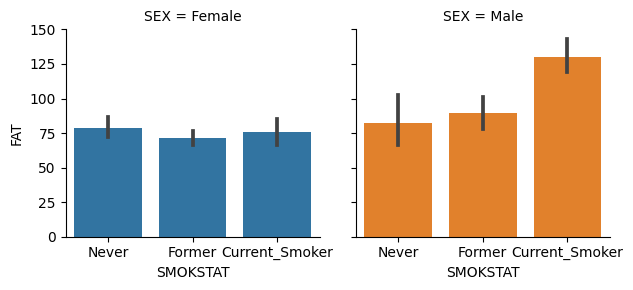

In [13]:
g = sns.FacetGrid(data=df, col='SEX', col_wrap=5, hue='SEX')
g.map(sns.barplot, "SMOKSTAT", "FAT");

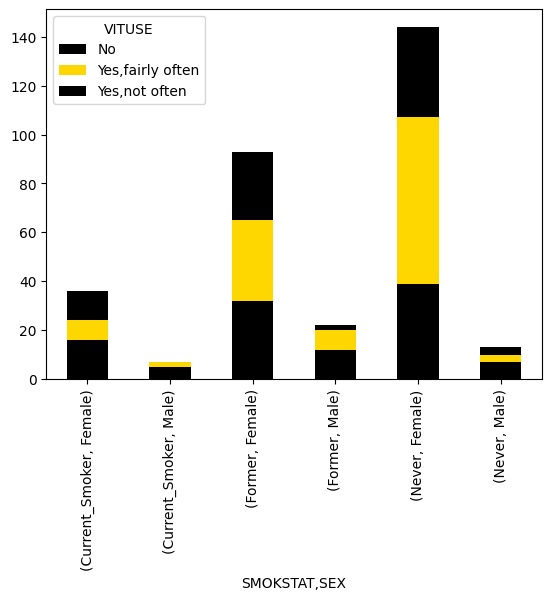

In [14]:
death_counts = pd.crosstab([df.SMOKSTAT, df.SEX], df.VITUSE)
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False);

In [15]:
df

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
0,64,Female,Former,21.48380,"Yes,fairly often",1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,"Yes,fairly often",1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,"Yes,not often",2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,"Yes,fairly often",1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,46,Female,Former,25.89669,No,2263.6,98.2,19.4,2.6,306.5,2572,1261,164,216
311,45,Female,Never,23.82703,"Yes,fairly often",1841.1,84.2,14.1,2.2,257.7,1665,465,80,328
312,49,Female,Never,24.26126,"Yes,fairly often",1125.6,44.8,11.9,4.0,150.5,6943,520,300,502
313,31,Female,Former,23.45255,"Yes,fairly often",2729.6,144.4,13.2,2.2,381.8,741,644,121,684


In [16]:
df.columns

Index(['AGE', 'SEX', 'SMOKSTAT', 'QUETELET', 'VITUSE', 'CALORIES', 'FAT',
       'FIBER', 'ALCOHOL', 'CHOLESTEROL', 'BETADIET', 'RETDIET', 'BETAPLASMA',
       'RETPLASMA'],
      dtype='object')

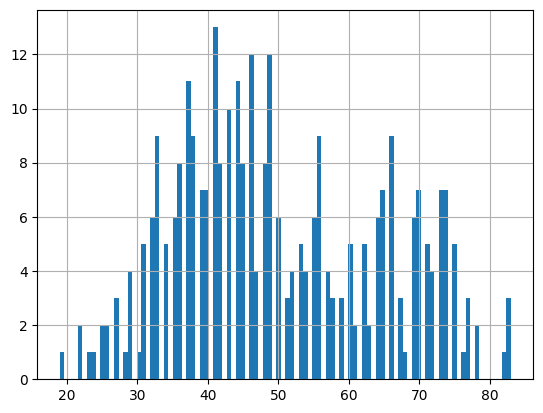

In [17]:
df.AGE.hist(bins=100);

<Axes: >

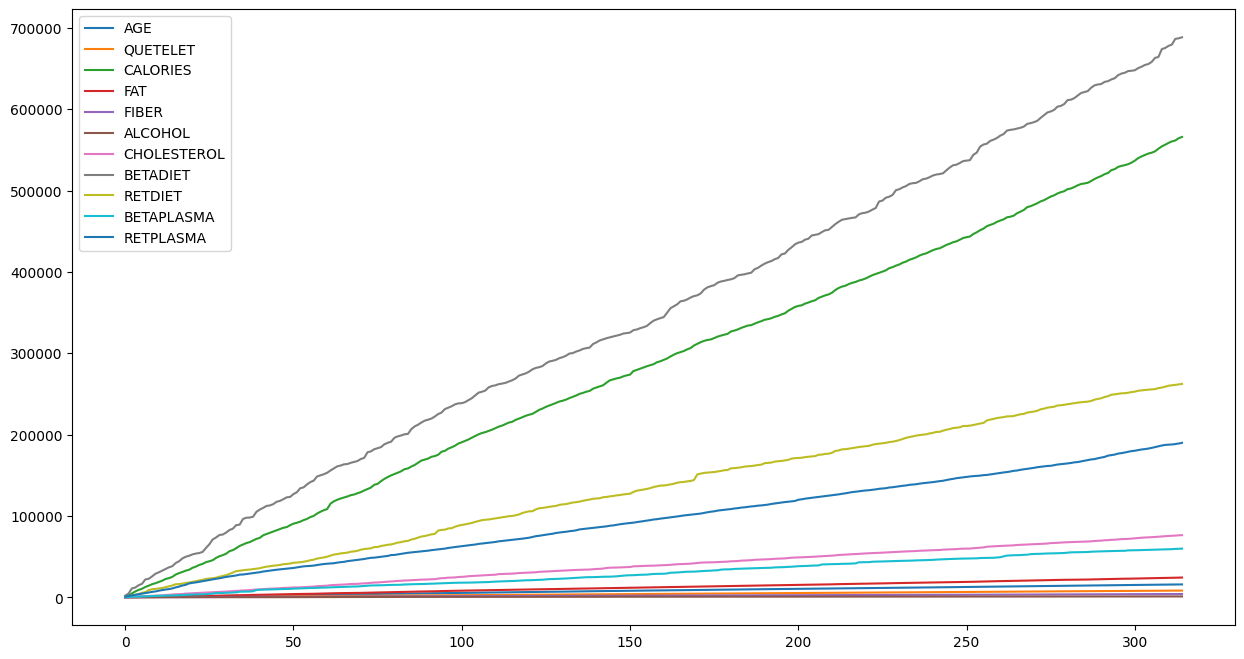

In [18]:
df.cumsum(0).plot(figsize=(15, 8))

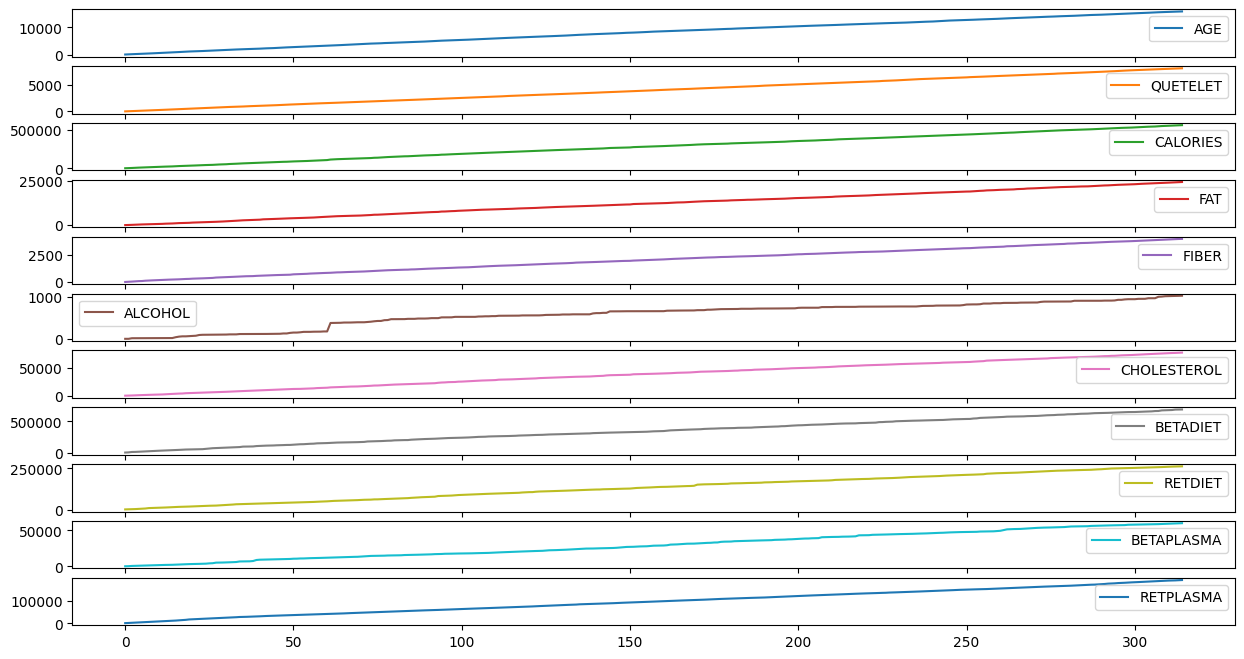

In [19]:
df.cumsum(0).plot(subplots=True, figsize=(15, 8));

<Axes: >

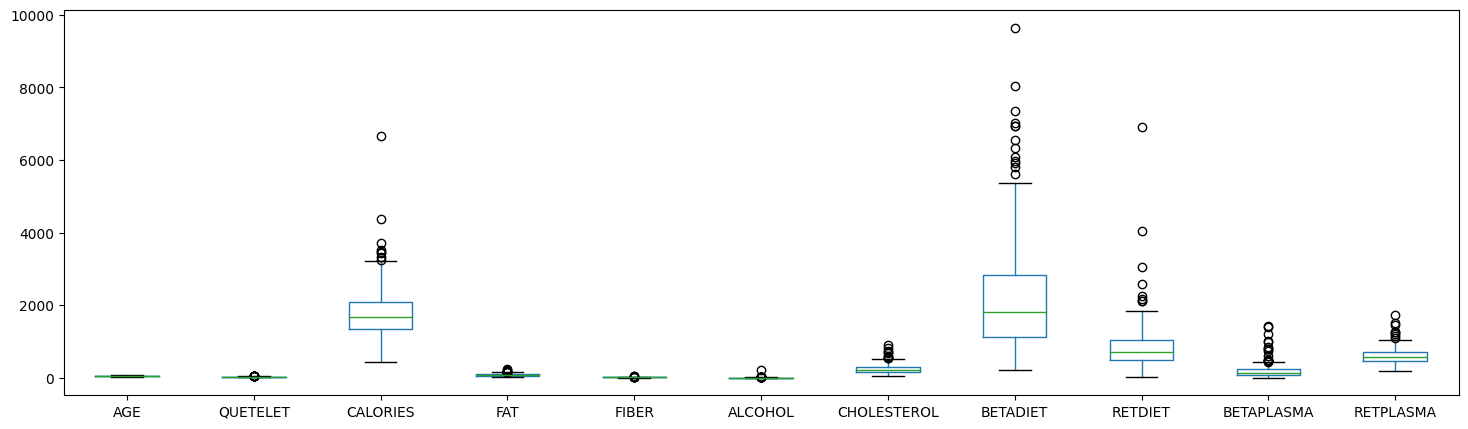

In [20]:
df.boxplot(grid=False, figsize=(18, 5))

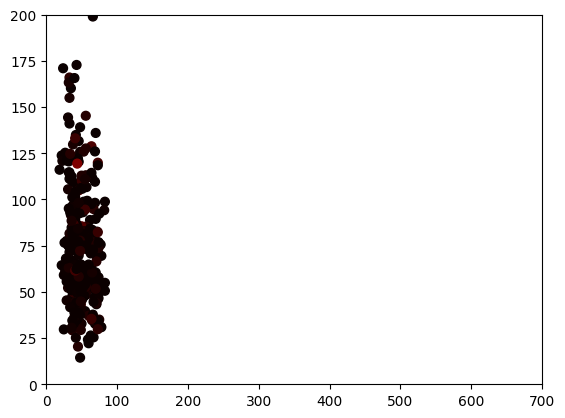

In [21]:
plt.scatter(df.AGE, df.FAT, c=df.ALCOHOL, s=40, cmap='hot')
plt.xlim(0, 700); plt.ylim(0, 200);

In [22]:
df.SEX.value_counts()

Female    273
Male       42
Name: SEX, dtype: int64

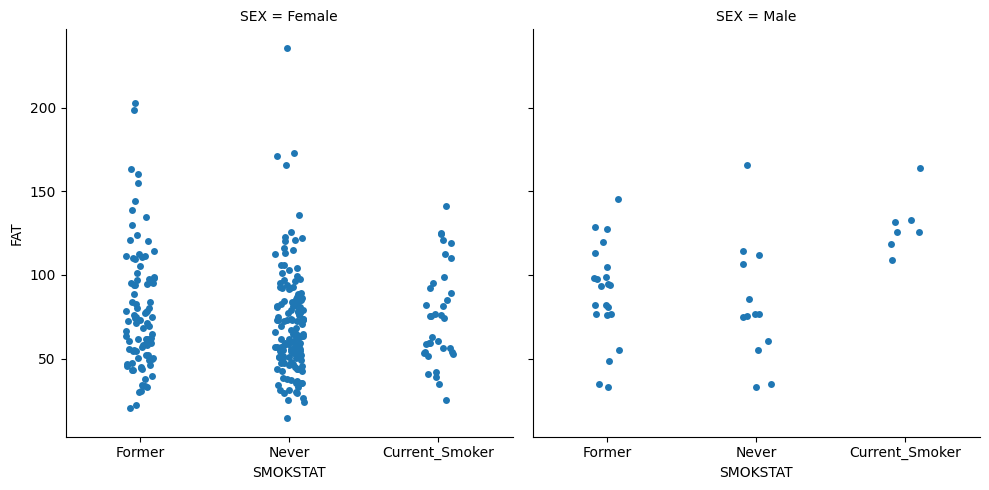

In [23]:
sns.catplot(x='SMOKSTAT', y='FAT', col='SEX', data=df)

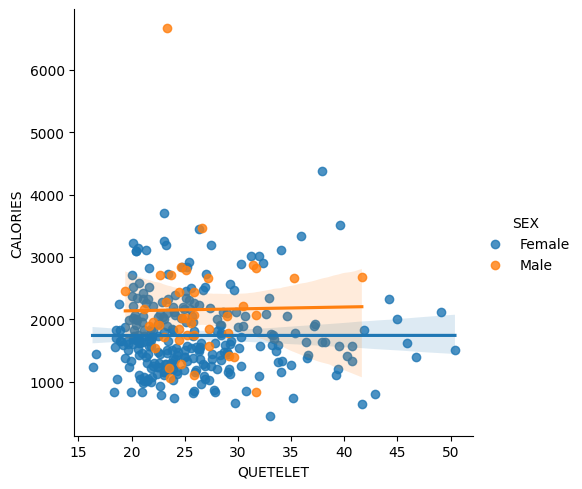

In [24]:
sns.lmplot(x="QUETELET", y="CALORIES", data=df, hue="SEX");

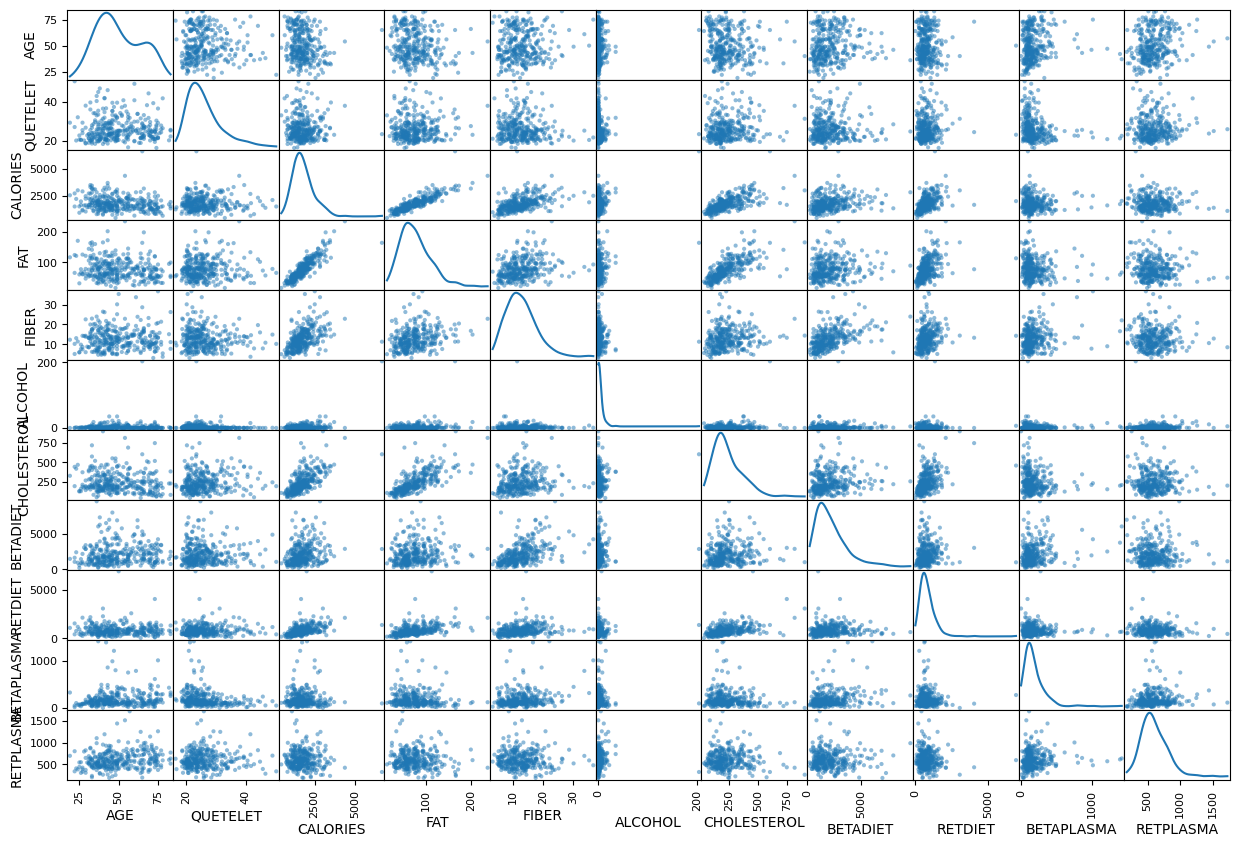

In [25]:
pd.plotting.scatter_matrix(df, figsize=(15,10), diagonal='kde');

In [30]:
df.head(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
0,64,Female,Former,21.48380,"Yes,fairly often",1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,"Yes,fairly often",1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,"Yes,not often",2372.3,83.6,19.1,14.1,257.9,6321,660,328,721


In [37]:
df.AGE.describe()

count    315.000000
mean      50.146032
std       14.575226
min       19.000000
25%       39.000000
50%       48.000000
75%       62.500000
max       83.000000
Name: AGE, dtype: float64

In [39]:
df['age_bins'] = pd.cut(x=df['AGE'], bins=[19, 33, 47, 61, 75, 83])

In [47]:
df\
    .groupby(['age_bins', 'SEX', 'SMOKSTAT', 'VITUSE'])\
    .agg(CALORIES_mean=('CALORIES', 'sum'), FAT_mean=('FAT', 'sum'))\
    .sort_values('SMOKSTAT', ascending=False)\
    .reset_index()

,age_bins,SEX,SMOKSTAT,VITUSE,CALORIES_mean,FAT_mean
0,"(75, 83]",Male,Never,"Yes,not often",2075.2,75.6
1,"(47, 61]",Female,Never,"Yes,not often",11421.4,495.6
2,"(33, 47]",Female,Never,"Yes,not often",29707.4,1256.3
3,"(75, 83]",Female,Never,"Yes,not often",1978.9,81.5
4,"(75, 83]",Female,Never,"Yes,fairly often",3607.5,175.3
...,...,...,...,...,...,...
85,"(61, 75]",Female,Current_Smoker,No,2755.4,104.8
86,"(61, 75]",Female,Current_Smoker,"Yes,fairly often",0.0,0.0
87,"(61, 75]",Female,Current_Smoker,"Yes,not often",1678.5,82.3
88,"(61, 75]",Male,Current_Smoker,No,11770.6,408.8


In [65]:
pd.pivot_table(df,
               index=["SEX", "SMOKSTAT", "VITUSE", "age_bins"],
               values=["CALORIES", "FAT"],
               fill_value=0).sort_values(['CALORIES', 'FAT'], ascending=False).reset_index()

,SEX,SMOKSTAT,VITUSE,age_bins,CALORIES,FAT
0,Male,Current_Smoker,No,"(61, 75]",3923.533333,136.266667
1,Male,Never,"Yes,fairly often","(19, 33]",3457.200000,166.000000
2,Male,Current_Smoker,No,"(47, 61]",2798.200000,125.900000
3,Male,Former,"Yes,not often","(47, 61]",2712.700000,145.300000
4,Male,Former,No,"(33, 47]",2706.700000,104.900000
5,Male,Current_Smoker,No,"(33, 47]",2667.500000,131.600000
6,Female,Former,"Yes,not often","(19, 33]",2646.060000,117.860000
7,Male,Current_Smoker,"Yes,fairly often","(33, 47]",2318.250000,121.100000
8,Male,Never,"Yes,not often","(19, 33]",2271.100000,114.600000
9,Female,Former,"Yes,fairly often","(19, 33]",2223.000000,97.920000


In [77]:
a = pd.pivot_table(df,
               index=["SEX", "SMOKSTAT", "age_bins"],
               values=["CALORIES", "FAT"],
               fill_value=0).sort_values('CALORIES', ascending=False).reset_index()

In [80]:
a.query('SEX =="Male"').value_counts().reset_index()

,SEX,SMOKSTAT,age_bins,CALORIES,FAT,0
0,Male,Current_Smoker,"(33, 47]",2434.666667,124.600000,1
1,Male,Current_Smoker,"(47, 61]",2798.200000,125.900000,1
2,Male,Current_Smoker,"(61, 75]",3923.533333,136.266667,1
3,Male,Former,"(33, 47]",2308.000000,97.566667,1
4,Male,Former,"(47, 61]",2196.716667,102.416667,1
5,Male,Former,"(61, 75]",1823.608333,79.750000,1
6,Male,Former,"(75, 83]",1933.600000,98.800000,1
7,Male,Never,"(19, 33]",2864.150000,140.300000,1
8,Male,Never,"(33, 47]",1055.000000,33.200000,1
9,Male,Never,"(47, 61]",2049.450000,96.100000,1


In [81]:
a.query('SEX =="Female"').value_counts().reset_index()

,SEX,SMOKSTAT,age_bins,CALORIES,FAT,0
0,Female,Current_Smoker,"(19, 33]",2042.987500,89.300000,1
1,Female,Current_Smoker,"(33, 47]",1617.042105,71.057895,1
2,Female,Current_Smoker,"(47, 61]",1588.983333,77.566667,1
3,Female,Current_Smoker,"(61, 75]",1477.966667,62.366667,1
4,Female,Former,"(19, 33]",2200.430769,97.953846,1
5,Female,Former,"(33, 47]",1930.557895,80.939474,1
6,Female,Former,"(47, 61]",1696.058333,71.958333,1
7,Female,Former,"(61, 75]",1526.862500,71.437500,1
8,Female,Former,"(75, 83]",1506.500000,62.250000,1
9,Female,Never,"(19, 33]",1945.228571,80.935714,1


In [92]:
b = pd.pivot_table(df,
               index=["SEX", "SMOKSTAT", "age_bins", "ALCOHOL", "FIBER"],
               values=["CALORIES", "FAT"],
               fill_value=0).reset_index()

In [93]:
b.query('SEX =="Female"').value_counts().reset_index()

,SEX,SMOKSTAT,age_bins,ALCOHOL,FIBER,CALORIES,FAT,0
0,Female,Current_Smoker,"(19, 33]",0.0,5.9,1517.4,59.1,1
1,Female,Never,"(33, 47]",2.5,12.9,1366.6,42.5,1
2,Female,Never,"(33, 47]",0.3,5.3,1256.7,43.7,1
3,Female,Never,"(33, 47]",0.3,6.9,1240.7,50.9,1
4,Female,Never,"(33, 47]",0.3,16.2,2419.3,122.7,1
...,...,...,...,...,...,...,...,...
263,Female,Former,"(47, 61]",0.1,9.3,1327.0,64.8,1
264,Female,Former,"(47, 61]",0.2,16.4,2908.5,139.1,1
265,Female,Former,"(47, 61]",0.7,12.1,1469.9,50.4,1
266,Female,Former,"(47, 61]",0.7,15.1,1546.6,72.9,1


In [99]:
b.query('SEX =="Female"').sort_values("FIBER", ascending=False).reset_index().head(10)

,index,SEX,SMOKSTAT,age_bins,ALCOHOL,FIBER,CALORIES,FAT
0,254,Female,Never,"(61, 75]",0.6,36.8,2511.5,92.3
1,228,Female,Never,"(47, 61]",7.3,35.4,1902.9,72.9
2,208,Female,Never,"(47, 61]",0.0,33.8,2837.3,84.2
3,216,Female,Never,"(47, 61]",0.6,30.2,2512.0,64.9
4,245,Female,Never,"(61, 75]",0.0,28.7,2213.9,52.0
5,65,Female,Former,"(33, 47]",0.5,26.5,2449.5,97.5
6,64,Female,Former,"(33, 47]",0.5,26.2,3258.3,101.2
7,217,Female,Never,"(47, 61]",1.2,25.2,3098.9,106.2
8,78,Female,Former,"(33, 47]",4.5,24.0,2838.8,88.5
9,117,Female,Former,"(61, 75]",0.0,23.9,2115.4,84.1


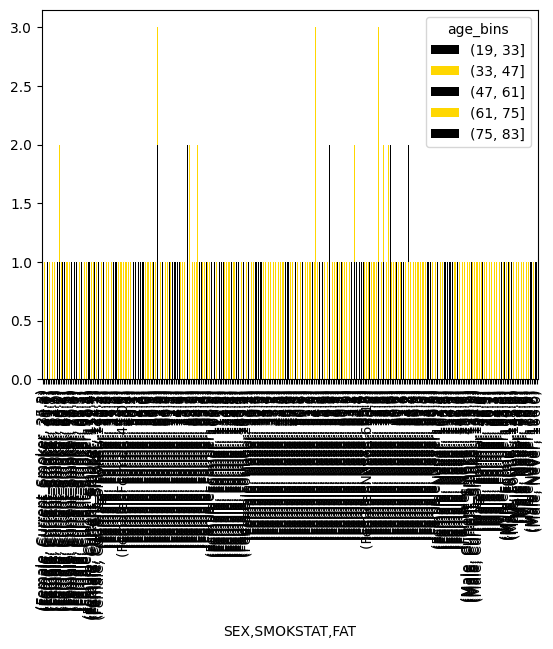

In [107]:
death_counts = pd.crosstab([b.SEX, b.SMOKSTAT, b.FAT], b.age_bins)
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False);

In [82]:
df

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA,age_bins
0,64,Female,Former,21.48380,"Yes,fairly often",1298.8,57.0,6.3,0.0,170.3,1945,890,200,915,"(61, 75]"
1,76,Female,Never,23.87631,"Yes,fairly often",1032.5,50.1,15.8,0.0,75.8,2653,451,124,727,"(75, 83]"
2,38,Female,Former,20.01080,"Yes,not often",2372.3,83.6,19.1,14.1,257.9,6321,660,328,721,"(33, 47]"
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615,"(33, 47]"
4,72,Female,Never,20.98504,"Yes,fairly often",1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799,"(61, 75]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,46,Female,Former,25.89669,No,2263.6,98.2,19.4,2.6,306.5,2572,1261,164,216,"(33, 47]"
311,45,Female,Never,23.82703,"Yes,fairly often",1841.1,84.2,14.1,2.2,257.7,1665,465,80,328,"(33, 47]"
312,49,Female,Never,24.26126,"Yes,fairly often",1125.6,44.8,11.9,4.0,150.5,6943,520,300,502,"(47, 61]"
313,31,Female,Former,23.45255,"Yes,fairly often",2729.6,144.4,13.2,2.2,381.8,741,644,121,684,"(19, 33]"
